In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv('insurance_data_logistic')


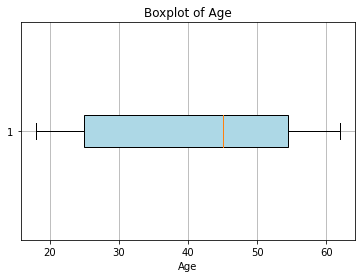

In [22]:
# 📊 Outlier detection using boxplot
plt.figure(figsize=(6, 4))
plt.boxplot(df['age'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.grid(True)
plt.show()


In [3]:
df.head(5)

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [4]:
X = df[['age']]  
y = df['bought_insurance']  


In [5]:
X

,age
0,22
1,25
2,47
3,52
4,46
5,56
6,55
7,60
8,62
9,61


In [7]:
y


0     0
1     0
2     1
3     0
4     1
5     1
6     0
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    1
15    1
16    1
17    1
18    0
19    0
20    0
21    0
22    1
23    1
24    1
25    1
26    0
Name: bought_insurance, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=101)


In [24]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [25]:

weight = model.coef_[0][0]       # Coefficient for 'age'
bias = model.intercept_[0]       # Intercept term

print(f"Model Weight (coef): {weight:.4f}")
print(f"Model Bias (intercept): {bias:.4f}")


Model Weight (coef): 0.1201
Model Bias (intercept): -4.8564


In [26]:
y_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Test Accuracy: 0.8333333333333334


In [28]:
kf = KFold(n_splits=5, shuffle=True, random_state=101)
fold_accuracies = []

for train_index, test_index in kf.split(X):
    X_ktrain, X_ktest = X.iloc[train_index], X.iloc[test_index]
    y_ktrain, y_ktest = y.iloc[train_index], y.iloc[test_index]
    model_k = LogisticRegression()
    model_k.fit(X_ktrain, y_ktrain)
    y_kpred = model_k.predict(X_ktest)
    acc = accuracy_score(y_ktest, y_kpred)
    fold_accuracies.append(acc)

print("K-Fold Accuracies:", fold_accuracies)
print("Average K-Fold Accuracy:", np.mean(fold_accuracies))

K-Fold Accuracies: [0.8333333333333334, 0.6666666666666666, 1.0, 1.0, 0.8]
Average K-Fold Accuracy: 0.86


In [13]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [14]:
ages = np.linspace(df['age'].min(), df['age'].max(), 300).reshape(-1, 1)
probabilities = model.predict_proba(ages)[:, 1]

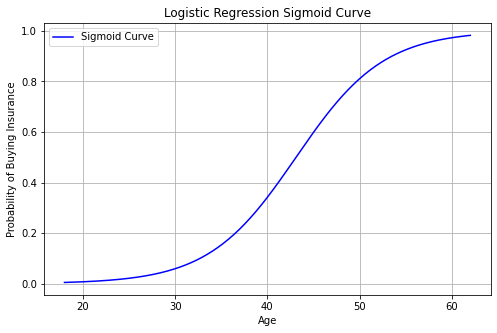

In [15]:
plt.figure(figsize=(8, 5))
plt.plot(ages, probabilities, color='blue', label='Sigmoid Curve')
plt.xlabel('Age')
plt.ylabel('Probability of Buying Insurance')
plt.title('Logistic Regression Sigmoid Curve')
plt.grid(True)
plt.legend()
plt.show()

In [34]:
# Predict on new unseen ages
new_ages = np.array([[20],[70] ,[30],[100],[5], [45], [60]])
new_preds = model.predict(new_ages)
new_probs = model.predict_proba(new_ages)[:, 1]

In [35]:
for age, pred, prob in zip(new_ages, new_preds, new_probs):
    print(f"Age: {age[0]} → Prediction: {pred} (Prob: {prob:.2f})")

Age: 20 → Prediction: 0 (Prob: 0.08)
Age: 70 → Prediction: 1 (Prob: 0.97)
Age: 30 → Prediction: 0 (Prob: 0.22)
Age: 100 → Prediction: 1 (Prob: 1.00)
Age: 5 → Prediction: 0 (Prob: 0.01)
Age: 45 → Prediction: 1 (Prob: 0.63)
Age: 60 → Prediction: 1 (Prob: 0.91)
